<a href="https://colab.research.google.com/github/christiandaso/Proyectos-Data-Science/blob/main/Anova%203%20factors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [182]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

In [211]:
#Creamos el dataframe

datos = {
   'TCconcen' : [-1,1,-1,1,-1,1,-1,1],
   'Fotocat' : [-1,-1,1,1,-1,-1,1,1],
   'Irradiation' : [-1,-1,-1,-1,1,1,1,1],
   'Muestra 1' : [75.53,58.69,93.33,85.09,90.23,74.99,99.55,92.91],
   'Muestra 2' : [77.8,57.52,96.13,84.24,88.43,74.99,96.56,93.84],
   'Muestra 3' : [76.24,56.37,94.21,85.92,86.66,76.49,93.67,91.96]
}

df = pd.DataFrame(datos)
df = df.sort_values(['Irradiation','Fotocat','TCconcen'])
df

,TCconcen,Fotocat,Irradiation,Muestra 1,Muestra 2,Muestra 3
0,-1,-1,-1,75.53,77.80,76.24
1,1,-1,-1,58.69,57.52,56.37
2,-1,1,-1,93.33,96.13,94.21
3,1,1,-1,85.09,84.24,85.92
4,-1,-1,1,90.23,88.43,86.66
5,1,-1,1,74.99,74.99,76.49
6,-1,1,1,99.55,96.56,93.67
7,1,1,1,92.91,93.84,91.96


In [212]:
#AGREGAMOS LA MEDIA Y LA DESVIACION ESTANDAR EN UNA COLUMNA
df['Media'] = round(((df['Muestra 1'] + df['Muestra 2'] + df['Muestra 3']) / 3),2)
daux = df[['Muestra 1','Muestra 2', 'Muestra 3']]
df['Desv. estandar'] = round((daux.std( axis = 1)),2)
df

,TCconcen,Fotocat,Irradiation,Muestra 1,Muestra 2,Muestra 3,Media,Desv. estandar
0,-1,-1,-1,75.53,77.80,76.24,76.52,1.16
1,1,-1,-1,58.69,57.52,56.37,57.53,1.16
2,-1,1,-1,93.33,96.13,94.21,94.56,1.43
3,1,1,-1,85.09,84.24,85.92,85.08,0.84
4,-1,-1,1,90.23,88.43,86.66,88.44,1.79
5,1,-1,1,74.99,74.99,76.49,75.49,0.87
6,-1,1,1,99.55,96.56,93.67,96.59,2.94
7,1,1,1,92.91,93.84,91.96,92.90,0.94


In [213]:
df2 = df[['Irradiation','Fotocat','TCconcen','Muestra 2']]
df2 = df2.rename(columns = {'Muestra 2':'Muestra'})
df3 = df[['Irradiation','Fotocat','TCconcen','Muestra 3']]
df3 = df3.rename(columns = {'Muestra 3':'Muestra'})
df = df[['Irradiation','Fotocat','TCconcen','Muestra 1']]
df = df.rename(columns = {'Muestra 1':'Muestra'})
df = df.sort_values(['Irradiation','Fotocat','TCconcen'])
df = pd.concat([df,df2,df3], ignore_index = True)
df

,Irradiation,Fotocat,TCconcen,Muestra
0,-1,-1,-1,75.53
1,-1,-1,1,58.69
2,-1,1,-1,93.33
3,-1,1,1,85.09
4,1,-1,-1,90.23
5,1,-1,1,74.99
6,1,1,-1,99.55
7,1,1,1,92.91
8,-1,-1,-1,77.80
9,-1,-1,1,57.52


#ANOVA

In [ ]:
!pip install pingouin


In [203]:
import pingouin as pg
pg.anova(
    data     = df,
    dv       = 'Muestra',
    between  = ["TCconcen", "Fotocat", "Irradiation"],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,TCconcen,763.0920,1.0,763.0920,322.7594,0.0000,0.9528
1,Fotocat,1898.7267,1.0,1898.7267,803.0905,0.0000,0.9805
2,Irradiation,592.1260,1.0,592.1260,250.4472,0.0000,0.9400
3,TCconcen * Fotocat,132.3051,1.0,132.3051,55.9601,0.0000,0.7777
4,TCconcen * Irradiation,52.4808,1.0,52.4808,22.1974,0.0002,0.5811
5,Fotocat * Irradiation,150.3502,1.0,150.3502,63.5925,0.0000,0.7990
6,TCconcen * Fotocat * Irradiation,0.0260,1.0,0.0260,0.0110,0.9178,0.0007
7,Residual,37.8284,16.0,2.3643,NaN,NaN,NaN


In [205]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
'Y ~ A + B + C + A:B + A:C + B:C + A:B:C'
model = ols('Muestra ~ TCconcen + Fotocat + Irradiation + TCconcen:Fotocat + TCconcen:Irradiation + Fotocat:Irradiation + TCconcen:Fotocat:Irradiation', df).fit()
anova_table = sm.stats.anova_lm(model, typ=2).round(4)
anova_table


,sum_sq,df,F,PR(>F)
TCconcen,763.0920,1.0,322.7594,0.0000
Fotocat,1898.7267,1.0,803.0905,0.0000
Irradiation,592.1260,1.0,250.4472,0.0000
TCconcen:Fotocat,132.3051,1.0,55.9601,0.0000
TCconcen:Irradiation,52.4808,1.0,22.1974,0.0002
Fotocat:Irradiation,150.3502,1.0,63.5925,0.0000
TCconcen:Fotocat:Irradiation,0.0260,1.0,0.0110,0.9178
Residual,37.8284,16.0,NaN,NaN


#Gráficos de interacción

<Axes: xlabel='TCconcen', ylabel='Muestra'>

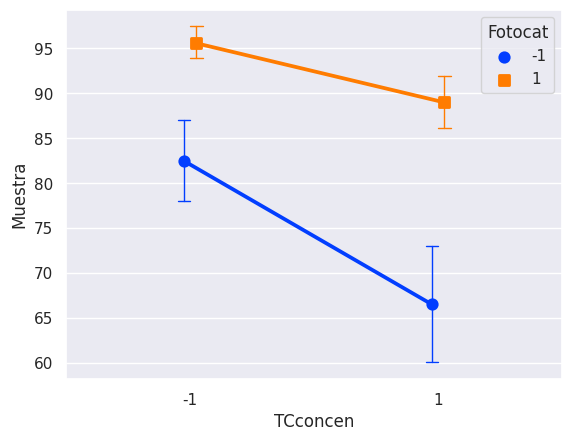

In [206]:
#utilizando seaborn
sns.set()
sns.pointplot(data=df,
              x='TCconcen',
              y='Muestra',
              hue='Fotocat',
              dodge=True,
              markers=['o', 's'],
              capsize= 0.05,
              errwidth= 1,
              palette='bright')

<Axes: xlabel='TCconcen', ylabel='Muestra'>

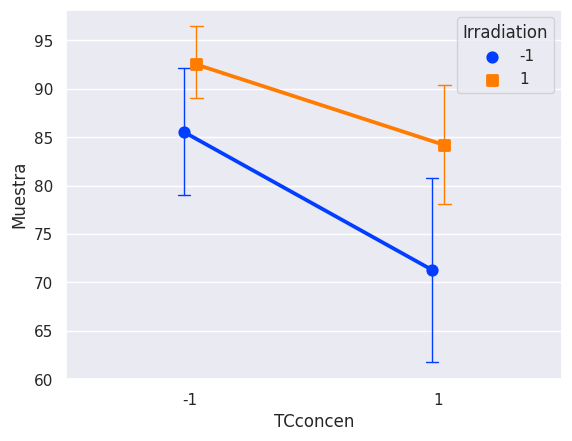

In [207]:
sns.set()
sns.pointplot(data=df,
              x='TCconcen',
              y='Muestra',
              hue='Irradiation',
              dodge=True,
              markers=['o', 's'],
              capsize= 0.05,
              errwidth= 1,
              palette='bright')

<Axes: xlabel='Fotocat', ylabel='Muestra'>

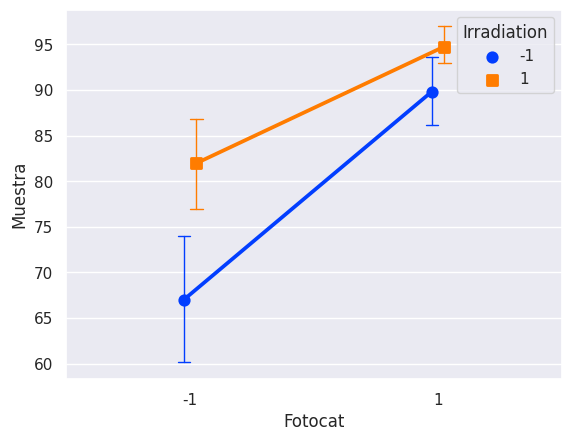

In [208]:
sns.set()
sns.pointplot(data=df,
              x='Fotocat',
              y='Muestra',
              hue='Irradiation',
              dodge=True,
              markers=['o', 's'],
              capsize= 0.05,
              errwidth= 1,
              palette='bright')

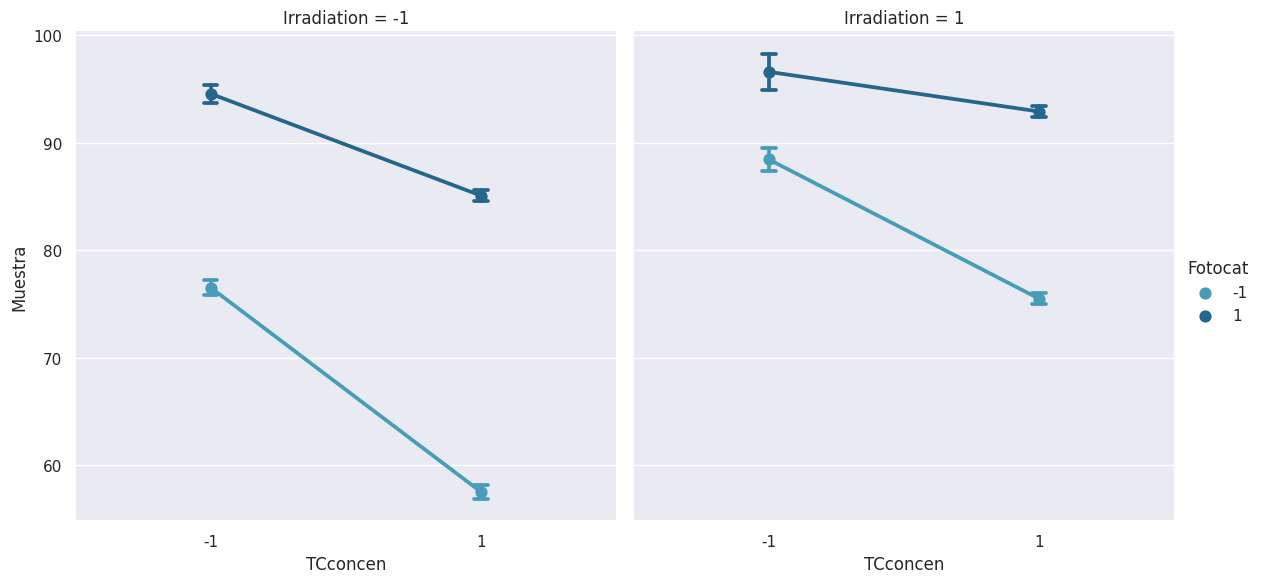

In [222]:
g = sns.catplot(
    data=df, x="TCconcen", y="Muestra", hue="Fotocat", col="Irradiation",
    capsize=.05, palette="YlGnBu_d", errorbar="se",
    kind="point", height= 6, aspect= 1,
)
g.despine(left=True)